## ✅ 문자 단위 RNN (Char RNN)
- 입출력의 단위가 단어 레벨이 아니라 문자 레벨

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

import numpy as np

## ✅ 1. 훈련 데이터 전처리
- 입력 데이터와 레이블에 대해서 문자 집합을 만들겠습니다. -> 중복은 제외해야 함!

In [ ]:
input_str = 'apple'
output_str = 'pple!'

char_vocab = sorted(list(set((input_str + output_str))))

vocab_size = len(char_vocab)
print('문자 집합 크기 : {}'.format(vocab_size))

- 📌 입력은 one-hot 벡터를 사용할 것이기 때문에 **입력의 크기는 문자 집합의 크기**가 되어야 함

In [ ]:
input_size = vocab_size
hidden_size = 5
output_size = 5
lr = 0.1

- 📌 문자 집합에 레이블 부여

In [ ]:
char_to_index = dict((c, i) for i, c in enumerate(char_vocab))

print(char_to_index)

In [ ]:
index_to_char = dict()

for k, v in char_to_index.items():
    index_to_char[v] = k

print(index_to_char)

- 📌 입력 데이터와 레이블 데이터를 구성하는 문자들을 정수로 맵핑하겠습니다.

In [ ]:
x_data = [char_to_index[c] for c in input_str]
y_data = [char_to_index[c] for c in output_str]

print(x_data)
print(y_data)

- 📌 NLP에서는 3차원 텐서가 기본이기 때문에, 배치 차원을 추가해주겠습니다.

In [ ]:
# 배치 차원 추가

x_data_ = [x_data]
y_data_ = [y_data]

print(x_data_)
print(y_data_)

In [ ]:
# Pytorch에서의 텐서 연산인 unsqueeze(0)도 활용 가능

x_data2 = torch.tensor(x_data).unsqueeze(0)
y_data2 = torch.tensor(y_data).unsqueeze(0)

print(x_data2.shape)
print(y_data2.shape)

- 📌 입력 시퀀스의 각 문자들을 one-hot 벡터로 변환!

In [ ]:
x_one_hot = [np.eye(vocab_size)[x] for x in x_data_]

print(x_one_hot)

- 📌 입력과 레이블 데이터를 텐서로 캐스팅 해주겠습니다

In [ ]:
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data_)

In [ ]:
# 텐서의 shape 확인

print('학습 데이터의 크기 : {}'.format(X.shape))
print('레이블 데이터의 크기 : {}'.format(Y.shape))

## ✅ 모델 구현하기

In [ ]:
class Net(nn.Module):

    def __init__(self, input_size, hidden_size, output_size):

        super(Net, self).__init__()

        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size, bias=True) # 출력층

    def forward(self, x): # 구현한 RNN 셀과 FC 층을 연결하는 역할

        x, _ = self.rnn(x)
        x = self.fc(x)

        return x

In [ ]:
net = Net(input_size, hidden_size, output_size)

In [ ]:
outputs = net(X)

print(outputs.shape)

- 📌 (1, 5, 5)의 크기를 가지는 output tensor를 나중에 정확도 측정을 위해 2차원 텐서로 바꾸는 과정이 필요함

In [ ]:
print(outputs.view(-1, output_size).shape)

In [ ]:
print(Y.shape)
print(Y.view(-1).shape)

- 📌 Optimzer와 loss function(criterion)을 정의해 봅시다

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr)

In [ ]:
# Training code

epoch = 100

for i in range(epoch):

    optimizer.zero_grad()

    outputs = net(X)

    loss = criterion(outputs.view(-1, output_size), Y.view(-1)) # view() -> Batch dimension 제거를 위해
    loss.backward() # 그래디언트 계산

    optimizer.step()

    # 프로그래스 바
    result = outputs.data.numpy().argmax(axis=2) # output(5개의 값)에 대해서 가장 높은 값의 인덱스 선택!, 숫자 형태
    result_str = ''.join([index_to_char[c] for c in np.squeeze(result)]) # helper function을 호출하여 char를 str 형태로 변환
    print(i, "loss : ", loss.item(), "prediction : ", result, "label : ", y_data, "output_str : ", result_str)

In [ ]:
input_str = 'ability'
output_str = 'ity!!!!'

char_vocab = sorted(list(set((input_str + output_str))))

vocab_size = len(char_vocab)

input_size = vocab_size
hidden_size = 7
output_size = 7
lr = 0.1

char_to_index = dict((c, i) for i, c in enumerate(char_vocab))

index_to_char = dict()

for k, v in char_to_index.items():
    index_to_char[v] = k

print(index_to_char)

x_data = [char_to_index[c] for c in input_str]
y_data = [char_to_index[c] for c in output_str]

x_data_ = [x_data]
y_data_ = [y_data]

x_one_hot = [np.eye(vocab_size)[x] for x in x_data_]

X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data_)

net = Net(input_size, hidden_size, output_size)

outputs = net(X)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr)

epoch = 100

for i in range(epoch):

    optimizer.zero_grad()

    outputs = net(X)

    loss = criterion(outputs.view(-1, output_size), Y.view(-1))
    loss.backward()

    optimizer.step()

    result = outputs.data.numpy().argmax(axis=2)
    result_str = ''.join([index_to_char[c] for c in np.squeeze(result)])
    print(i, "loss : ", loss.item(), "prediction : ", result, "label : ", y_data, "output_str : ", result_str)

# 📍 문자 단위 RNN - with Sentence data

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

## ✅ 1. 훈련 데이터 전처리하기

In [ ]:
sentence = ("if you want to build a ship, don't drum up people together to "
            "collect wood and don't assign them tasks and work, but rather "
            "teach them to long for the endless immensity of the sea.")

In [ ]:
print(len(sentence))

In [ ]:
char_set = sorted(list(set(sentence))) # 문자 집합 생성
char_dic = {c: i for i, c in enumerate(char_set)} # 각 문자에 정수 인코딩

print(char_dic) # ❗❗ 문자에서는 공백도 하나의 원소로 대응 ❗❗

- 📌 각 문자에 single-digit 레이블을 부여하였으며, 25의 크기를 가지는 문자 집합 완성

In [ ]:
print('문자 집합의 크기 : {}'.format(len(char_dic)))

- 📌 입력은 one-hot 벡터로 사용할 것이기 때문에 변환 과정 필요

In [ ]:
# 문장 데이터이기 때문에 단위별로 끊어서 처리
# sentence_length라는 변수를 활용해보자

hidden_size = len(char_dic)
sentence_length = 10 # 문장을 문자 10개 단위로 끊어서 전처리
lr = 0.1

In [ ]:
# 데이터 구성

x_data = list()
y_data = list()

for i in range(0, len(sentence) - sentence_length):
    x_str = sentence[i: i + sentence_length]
    y_str = sentence[i + 1: i + sentence_length + 1]
    print(i, x_str, '->', y_str)

    x_data.append([char_dic[c] for c in x_str]) # 입력 데이터를 single-digit화
    y_data.append([char_dic[c] for c in y_str])

- 📌 현재까지 총 170개로 구성된 데이터 셋(x, y 페어)를 생성하였음. 각 페어의 입력 데이터는 고유 정수로 인코딩이 된 상태

In [ ]:
print(x_data[0])
print(y_data[0])

In [ ]:
x_one_hot = [np.eye(len(char_dic))[x] for x in x_data] # one-hot 벡터 새애성

X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

In [ ]:
print('학습 데이터의 크기 : {}'.format(X.shape))
print('레이블 데이터의 크기 : {}'.format(Y.shape))

In [ ]:
print(Y[0])

## ✅ 모델 구현하기

In [ ]:
class Net(torch.nn.Module):

    def __init__(self, input_dim, hidden_dim, layers):

        super(Net, self).__init__()

        self.rnn = torch.nn.RNN(input_dim, hidden_dim, num_layers=layers, batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, hidden_dim, bias=True)

    def forward(self, x):
        x, _ = self.rnn(x)
        x = self.fc(x)

        return x

In [ ]:
dic_size = len(char_dic)

net = Net(dic_size, hidden_size, 2) # hidden layer가 2층 짜리인 DRNN

In [ ]:
# 손실 함수

criterion = nn.CrossEntropyLoss()

# 옵티마이저

optimizer = optim.Adam(net.parameters(), lr)

## ✅ 학습 진행

In [ ]:
epoch = 100

for i in range(epoch):

    optimizer.zero_grad()

    outputs = net(X) # (170, 10, 25) 크기를 가진 텐서를 매 에포크마다 모델의 입력으로 사용

    loss = criterion(outputs.view(-1, dic_size), Y.view(-1))
    loss.backward()

    optimizer.step()

    # results의 텐서 크기는 (170, 10)
    results = outputs.argmax(dim=2)

    predict_str = str()

    for j, result in enumerate(results) :
        if j == 0: # 처음에는 예측 결과를 전부 가져오지만
            predict_str += ''.join([char_set[t] for t in result])
        else:
            predict_str += char_set[result[-1]]

    print(predict_str)

In [ ]:
## Charseq 실습

smaple = " if you want you"

# 딕셔너리 만들기

char_set = sorted(list(set(smaple)))
char_dic = {c: i for i, c in enumerate(char_set)}
dic_size = len(char_dic)

print(char_dic)

# 네트워크 하이퍼파라미터 설정

hidden_size = dic_size # 은닉층 사이즈는 문자 집합 크기와 무관!!! 랜덤하게 사용 가능

# 데이터 준비

idx = [char_dic[c] for c in smaple]
x_data = [idx[:-1]]

print('x data : {}'.format(x_data))

x_one_hot = [np.eye(dic_size)[x] for x in x_data]

print('one-hot vector : {}'.format(x_one_hot))

y_data = [idx[1:]]

print('y data : {}'.format(y_data))

In [ ]:
# tensor casting

X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

# RNN 선언

rnn = nn.RNN(dic_size, hidden_size, batch_first=True)

# Loss와 optimizer 정의

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(rnn.parameters(), lr)

In [ ]:
# 간단한 학습 코드

epoch = 50

for i in range(epoch):

    optimizer.zero_grad()

    outputs, _ = rnn(X)

    loss = criterion(outputs.view(-1, dic_size), Y.view(-1))
    loss.backward()

    optimizer.step()

    # 결과

    results = outputs.data.numpy().argmax(axis=2)
    predict_str = ''.join([char_set[c] for c in np.squeeze(results)])
    print(i, "loss : ", loss.item(), "prediction : ", result, "label : ", y_data, "prediciton_str : ", result_str)

# 📍 Char RNN으로 이름 분류하기
- 데이터 주소 : https://download.pytorch.org/tutorial/data.zip

In [ ]:
from google.colab import drive

import sys
import os

drive.mount('/content/drive')

- data/names/[language].txt이 18개 존재
- 각 파일에는 한 줄에 하나의 이름이 적혀져 있음 -> 로마자로 되어 있음
- UNICODE -> ASCII

In [ ]:
from __future__ import unicode_literals, print_function, division
from io import open

import glob
import os

def findFiles(path):
    return glob.glob(path)

print(findFiles('/content/drive/My Drive/Colab Notebooks/Deep Learning/data/names/*.txt'))

In [ ]:
import unicodedata
import string

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters) # 57 => 26 + 26 + 5

# 유니코드 문자열을 ASCII로 변환

def unicode2Ascii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

print(unicode2Ascii('Ślusàrski'))

In [ ]:
# 이름 데이터 파일을 읽고 줄 단위로 분리 -> 데이터 셋 구축!!

def readLines(filename) :
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicode2Ascii(line) for line in lines]

In [ ]:
category_lines = dict()
all_categories = list()

for filename in findFiles('/content/drive/My Drive/Colab Notebooks/Deep Learning/data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)

print(all_categories)
print(category_lines)

- 📌 각 category(언어)를 line(이름)에 매핑하는 dict인 category_lines 생성

In [ ]:
print(category_lines['Korean'][5:10])

## ✅ 이름을 텐서로 변경
- 하나의 문자를 표현하기 위해 one-hot 벡터를 사용
- 단어를 만들기 위해 one-hot 벡터들을 2차원 매트릭스로 만들어 주어야 합니다.

In [ ]:
import torch

# all_letters로 문자의 위치(인덱스) 찾기 => 'a' -> 0

def letterToIndex(letter):
    return all_letters.find(letter)

# 문자 하나를 one-hot vector(1 * 문자 집합의 크기) 텐서로 변환하는 함수

def letterToTensor(letter):
    t = torch.zeros(1, n_letters) # n_letters : 문자 집합의 크기
    t[0][letterToIndex(letter)] = 1
    return t

In [ ]:
# 이름을 <line_length * 1 n_letters> 로 바꿔주어야 함

def nameToTensor(name) :
    tensor = torch.zeros(len(name), 1, n_letters)
    for n, letter in enumerate(name):
        tensor[n][0][letterToIndex(letter)] = 1
    return tensor

In [ ]:
print(letterToTensor('J'))

In [ ]:
print(nameToTensor('Jones').size())

## ✅ 모델 구현

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size, hidden_size) # M * N
        self.h2h = nn.Linear(hidden_size, hidden_size) # N * N => (M * N) * (N * N) = (M * N)
        self.h2o = nn.Linear(hidden_size, output_size) # N * P => (M * N) * (N * P) = (M * P)
        self.softmax = nn.LogSoftmax(dim=1) # M * P

    def forward(self, input, hidden):
        hidden = F.tanh(self.i2h(input) + self.h2h(hidden))
        output = self.h2o(hidden)
        output = self.softmax(self.h2o(hidden))

        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

In [ ]:
n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

In [ ]:
input = letterToTensor('A')
hidden = torch.zeros(1, n_hidden)

output_l, next_hidden = rnn(input, hidden)

print(output_l)

In [ ]:
input = nameToTensor('Albert')
hidden = torch.zeros(1, n_hidden)

output_n, next_hidden = rnn(input[0], hidden)

print(output_n)

## ✅ 학습 준비
- Hepler function을 선언하자
- 네트워크에는 softmax layer가 들어가 있습니다!
- FC layer의 마지막 출력층에 softmax 함수가 적용된다면 CELoss를 쓸 수 없다! -> NLL(Negative Log Likelihood) loss를 써야 함

In [ ]:
# Hepler function

def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item() # 텐서에서 정수 값으로 변경

    return all_categories[category_i], category_i

print(categoryFromOutput(output_l))

In [ ]:
import random

def randomChoice(l) :
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    name = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    name_tensor = nameToTensor(name)

    return category, name, category_tensor, name_tensor


for _ in range(10):
    category, name, category_tensor, name_tensor = randomTrainingExample()
    print('category = ', category, '/ name = ', name)

## ✅ 모델 학습
- nn.CELoss => nn.NLLoss + Softmax()

In [ ]:
critierion = nn.NLLLoss()

In [ ]:
lr = 0.005

In [ ]:
def train(category_tensor, name_tensor):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(name_tensor.size()[0]):
        output, hidden = rnn(name_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-lr)

    return output, loss.item()

In [ ]:
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000

# 시각화를 위한 loss 추적
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # 현재 평균 loss을 전체 loss 리스트에 추가
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

## ✅ Confusion Matrix

- Row가 label, Column이 prediction
- 실제 언어가 네트워크에서 어떤 언어로 추론이 되는지를 확인하기 위한 혼란, 혼돈 행렬

In [ ]:
confusion = torch.zeros(n_categories, n_categories)
n_conf = 10000

def evaluate(name_tensor):
    hidden = rnn.initHidden()

    for i in range(name_tensor.size()[0]):
        output, hidden = rnn(name_tensor[i], hidden)

    return output

In [ ]:
for i in range(n_conf):
    category, line, category_tensor, name_tensor = randomTrainingExample()
    output = evaluate(name_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()


fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.show()

In [ ]:
def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)

    with torch.no_grad():
        output = evaluate(nameToTensor(input_line))

        # TopK prediciton
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = list()

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])

predict('Mo')

# 📍 문자 단위 RNN으로 이름 생성하기

In [ ]:
from google.colab import drive

import sys
import os

drive.mount('/content/drive')

In [ ]:
from __future__ import unicode_literals, print_function, division
from io import open

import glob
import os
import unicodedata
import string

# 문자 집합 만들기

all_letters = string.ascii_letters + " .,;'-"
n_letters = len(all_letters) + 1 # 왜 1을 더해줄까? -> EOS(end of sentence)

# Help function 만드는 과정

def findFiles(path):
    return glob.glob(path)

# UNICODE -> ASCII

def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

# 파일을 읽고 줄 단위로 분리해서 이름을 Ascii로

def readLines(filename) :
    with open(filename, encoding='utf-8') as some_file:
        return [unicodeToAscii(name.strip()) for name in some_file]

# 각 언어권의 이름 목록인 딕셔너리 생성

category_names = dict()
all_categories = list()

for filename in findFiles('/content/drive/My Drive/Colab Notebooks/Deep Learning/data/names/*.txt') :
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    names = readLines(filename)
    category_names[category] = names

n_c = len(all_categories)

print(n_c)

In [ ]:
print(category_names)

In [ ]:
import torch

# all_letters로 문자의 주소 찾기, 예시 "a" = 0

def letterToIndex(letter):
    return all_letters.find(letter)

# 검증을 위해서 한 개의 문자를 <1 x n_letters> Tensor로 변환

def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# 한 줄(이름)을 <line_length x 1 x n_letters>
# 또는 one-hot 문자 벡터의 array로 변경

def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line) :
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

## ✅ 네트워크 생성
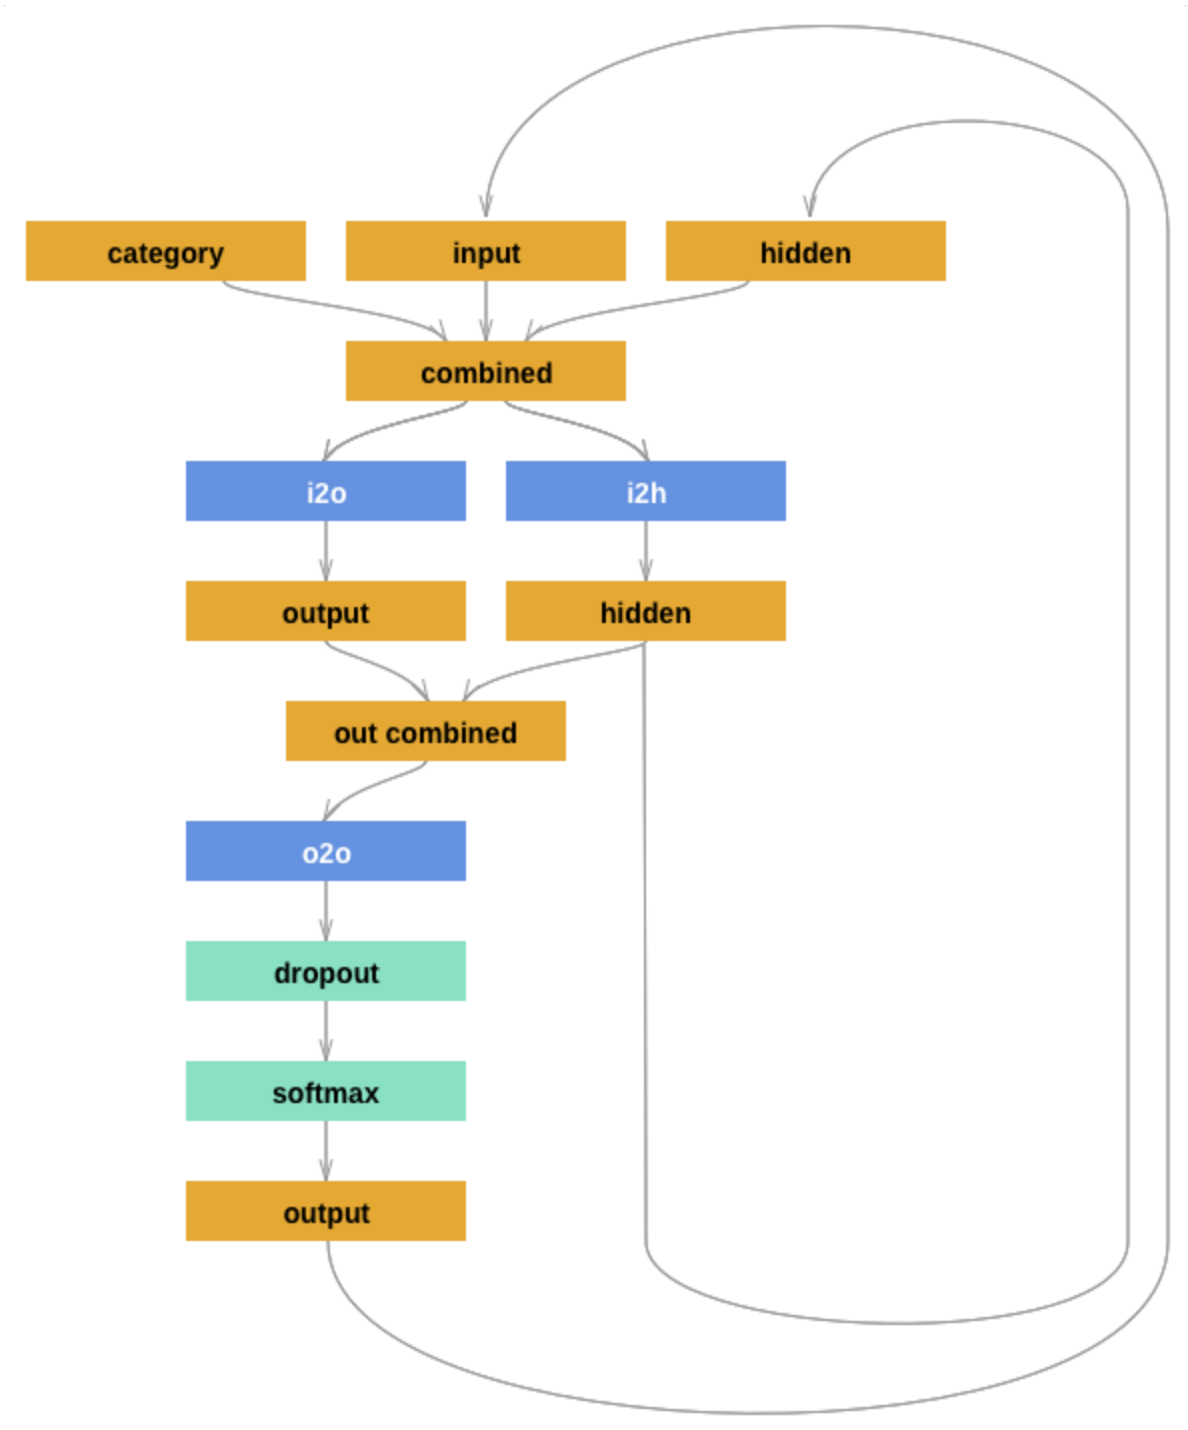

In [ ]:
import torch
import torch.nn as nn

class RNN(nn.Module) :

    def __init__(self, input_size, hidden_size, output_size) :
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        # input to hidden linear layer
        self.i2h = nn.Linear(n_c+ input_size + hidden_size, hidden_size)

        # input to output linear layer
        self.i2o = nn.Linear(n_c + input_size + hidden_size, output_size)

        # output to output linear layer
        self.o2o = nn.Linear(hidden_size + output_size, output_size)
        self.dropout = nn.Dropout(0.1)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, category, input, hidden) :
        combined_1 = torch.cat((category, input, hidden), 1)
        hidden = self.i2h(combined_1)
        output = self.i2o(combined_1)

        combined_2 = torch.cat((hidden, output), 1)
        x = self.o2o(combined_2)
        x = self.dropout(x)
        x = self.softmax(x)

        return x, hidden

    def initHidden(self) :
        return torch.zeros(1, self.hidden_size)

## ✅ 학습 준비

In [ ]:
import random

def randomChoice(l) :
    return l[random.randint(0, len(l) - 1)]

# 임의의 카테고리와, 그 카테고리에서의 이름 pair 얻기
def randomTrainingPair() :
    category = randomChoice(all_categories)
    name = randomChoice(category_names[category])

    return category, name

In [ ]:
'DOYOUNG'

('D', 'O')
('O', 'Y')
('Y', 'O')
('O', 'U')
('U', 'N')
('N', 'G')
('G', 'EOS')

Input = 'D', 'O', 'Y', 'O', 'U', 'N', 'G'
Output = 'O', 'U', 'N', 'G', 'EOS'

In [ ]:
# Category를 원-핫 인코딩 시키기 위한 함수

def categoryToTensor(category) :
    l = all_categories.index(category)
    t = torch.zeros(1, n_c)
    t[0][l] = 1

    return t

# Input을 원-핫 인코딩 시키기 위한 함수

def inputToTensor(line) :
    t = torch.zeros(len(line), 1, n_letters)

    for l in range(len(line)) :
        letter = line[l]
        t[l][0][all_letters.find(letter)] = 1

    return t

# 타겟 값을 위한 두번째 문자부터 마지막(EOS)까지의 ``LongTensor``
def targetTensor(line) :
    letter_indexes = [all_letters.find(line[l]) for l in range(1, len(line))]
    letter_indexes.append(n_letters - 1) # EOS

    return torch.LongTensor(letter_indexes)

In [ ]:
# 임의 언어에서 category, input, target tensor를 리턴해주는 함수

def randomTrainingExample() :
    category, name = randomTrainingPair()
    category_tensor = categoryToTensor(category)
    input_tensor = inputToTensor(name)
    target_tensor = targetTensor(name)

    return category_tensor, input_tensor, target_tensor

## ✅ 네트워크 학습

In [ ]:
criterion = nn.NLLLoss()
lr = 0.0005

def train(category_tensor, input_tensor, target_tensor) :
    target_tensor.unsqueeze_(-1)
    # torch.squeeze()
    # x = torch.rand(1, 1, 20, 200)
    # x = x.squeeze() [1, 1, 20, 200] -> [20, 200]

    # torch.unsqueeze()
    # x = torch.rand(3, 20, 200)
    # x = x.unsqueeze(dim=1) [3, 20, 200] -> [3, 1, 20, 200]
    hidden = rnn.initHidden()

    rnn.zero_grad()
    loss = torch.Tensor([0])

    for i in range(input_tensor.size(0)) :
        output, hidden = rnn(category_tensor, input_tensor[i], hidden)
        l = criterion(output, target_tensor[i])
        loss += l

    loss.backward()

    for p in rnn.parameters() :
        p.data.add_(p.grad.data, alpha =- lr)

    return output, loss.item() / input_tensor.size(0)

In [ ]:
import time
import math

def timeSince(since) :
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60

    return '%dm %ds' % (m, s)

In [ ]:
rnn = RNN(n_letters, 128, n_letters)
print(rnn)

n_iters = 100000
print_every = 5000
plot_every = 1000

all_losses = list()
total_loss = 0

start_time = time.time()

for iter in range(1, n_iters + 1) :
    output, loss = train(*randomTrainingExample())
    total_loss += loss

    if iter % print_every == 0 :
        print('%s (%d %d%%) %.4f' % (timeSince(start_time), iter, iter / n_iters * 100, loss))

    if iter % plot_every == 0 :
        all_losses.append(total_loss / plot_every)
        total_loss = 0

In [ ]:
plt.plot(all_losses)

### 네트워크 샘플링
샘플링을 위해서, 네트워크에 하나의 글자를 주고 다음 문자를 물어보고 이것을 다음 문자로 전달하는 것을 EOS 토큰까지 반복합니다.
- 입력 카테고리(언어), 시작문자, 비어있는 은닉 상태를 위한 Tensor를 생성하고,
- 시작 문자로 output_name 문자열을 생성한 후에
- 최대 출력 길이까지,
    - 현재 문자를 네트워크에 전달합니다.
    - 가장 높은 output 값으로 다음 문자와 다음 은닉 상태를 얻습니다.
    - 만일 문자가 EOS면, STOP
    - 만일 일반적인 문자라면, output_name에 추가하고 과정 반복.
    - 마지막에 이름을 판단한 결과를 얻습니다!

In [ ]:
max_length = 20

# 카테고리와 시작 문자로부터 샘플링하기

def sample(category, start_letter='A') :
    with torch.no_grad() : # 샘플링에서 히스토리를 추적할 필요 없음
        category_tensor = categoryToTensor(category)
        input = inputToTensor(start_letter)
        hidden = rnn.initHidden()

        output_name = start_letter

        for i in range(max_length) :
            output, hidden = rnn(category_tensor, input[0], hidden)
            topv, topi = output.topk(1)
            topi = topi[0][0]
            if topi == n_letters - 1 : # EOS면 그만 동작해라!
                break
            else :
                letter = all_letters[topi]
                output_name += letter
            input = inputToTensor(letter)

        return output_name

# 하나의 카테고리와 여러 시작 문자들로 여러 개의 샘플 얻기

def samples(category, start_letters='ABC') :
    for start_letter in start_letters :
        print(sample(category, start_letter))

samples('Russian', 'RUS')
samples('German', 'GER')
samples('Spanish', 'SPA')
samples('Chinese', 'CHI')